In [1]:
import numpy as np
import pandas as pd
import dowhy
import matplotlib.pyplot as plt
from causalgraphicalmodels import CausalGraphicalModel
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',35)
import sys
#sys.path.append("../scripts/")
#from plot import plot_distribution
import warnings
warnings.filterwarnings('ignore')
from dowhy import CausalModel
from IPython.display import Image, display

In [2]:
sys.path.insert(0,'../scripts/')

In [3]:
df = pd.read_csv("../data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df = df.drop(['id', 'Unnamed: 32'], axis=1) # drop unwanted columns 'id' and 'Unnamed: 32'

The target column is changed to a numerical value by representing 'M' with 1 and 'B' with 0 

In [5]:
x = {'B':0, 'M':1}
df['diagnosis'] = df['diagnosis'].map(x)

In [6]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
# import class from local libraries
from causal import Causal
from modelling import Models

In [12]:
causal = Causal()
modelling = Models(df)

In [9]:
modelling.split_data()

Train:  (455, 31)
Hold-out:  (114, 31)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, random_state=20, test_size=0.2)

print('Train: ', train.shape)
print('Hold-out: ', test.shape)

Train:  (455, 31)
Hold-out:  (114, 31)


In [8]:
xs = train.iloc[:,2:].columns.tolist()

In [9]:
# Create a causal model from the train data.
model= CausalModel(
        data = train,
        treatment='radius_mean',
        outcome='diagnosis',
        common_causes=xs
        )

In [10]:
model.view_model(layout="dot")

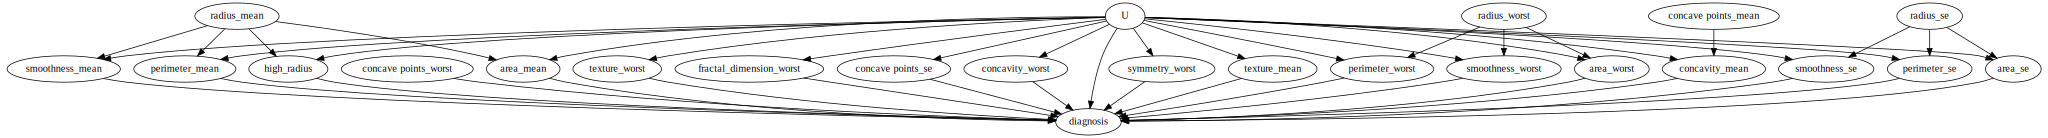

In [15]:
#area and perimeter functions of radius
from causalgraphicalmodels import CausalGraphicalModel
causal = CausalGraphicalModel(
    nodes=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'concavity_mean', 'concave points_mean', 'radius_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis',
       'high_radius','U'],
    edges=[
        ("radius_mean", "perimeter_mean"), 
        ("radius_mean", "area_mean"),
        ("radius_mean","smoothness_mean"),
        ("concave points_mean","concavity_mean"),
        ("radius_mean","high_radius"),
        ("radius_se", "perimeter_se"), 
        ("radius_se", "area_se"),
        ("radius_se","smoothness_se"),
        ("radius_worst", "perimeter_worst"), 
        ("radius_worst", "area_worst"),
        ("radius_worst","smoothness_worst"),
        ("concave points_worst","concavity worst"),
        ("U","perimeter_mean"),
        ("U","area_mean"),
        ("U","texture_mean"),
        ("U","smoothness_mean"),
        ("U","concavity_mean"),
        ("U","perimeter_se"),
        ("U","area_se"),
        ("U","concave points_se"),
        ("U","smoothness_se"),
        ("U","perimeter_worst"),
        ("U","area_worst"),
        ("U","texture_worst"),
        ("U","smoothness_worst"),
        ("U","concavity_worst"),
        ("U","symmetry_worst"),
        ("U","fractal_dimension_worst"),
        ("U","high_radius"),
        ("U","diagnosis"),
        ("high_radius","diagnosis"),
        ("perimeter_mean","diagnosis"),
        ("area_mean","diagnosis"),
        ("texture_mean","diagnosis"),
        ("smoothness_mean","diagnosis"),
        ("concavity_mean","diagnosis"),
        ("smoothness_mean","diagnosis"),
        ("concavity_mean","diagnosis"),
        ("perimeter_se","diagnosis"),
        ("area_se","diagnosis"),
        ("smoothness_se","diagnosis"),
        ("concavity_se","diagnosis"),
        ("smoothness_se","diagnosis"),
        ("concave points_se","diagnosis"),
        ("concave points_worst","diagnosis"),
        ("perimeter_worst","diagnosis"),
        ("area_worst","diagnosis"),
        ("texture_worst","diagnosis"),
        ("smoothness_worst","diagnosis"),
        ("concavity_worst","diagnosis"),
        ("smoothness_worst","diagnosis"),
        ("symmetry_worst","diagnosis"),
        ("fractal_dimension_worst","diagnosis")
    ]
)
# draw return a graphviz `dot` object, which jupyter can render
causal.draw()

#### The ground truth graph - using all the training data

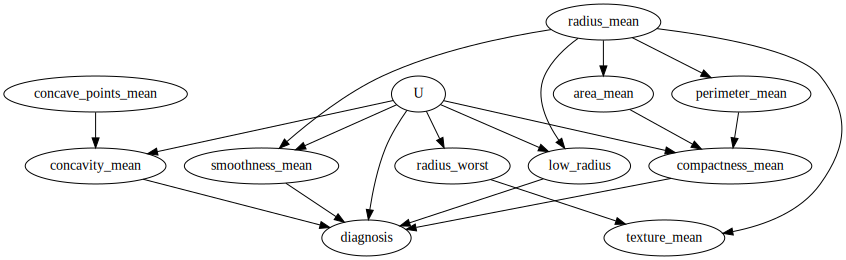

In [16]:
from causalgraphicalmodels import CausalGraphicalModel
causal2 = CausalGraphicalModel(
    nodes=['radius_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean',
           'concave_points_mean','diagnosis','low_radius','texture_mean','radius_worst','U'],
    edges=[
        ("radius_mean", "perimeter_mean"), 
        ("radius_mean", "area_mean"),
        ("radius_mean", "texture_mean"),
        ("radius_mean","smoothness_mean"),
        ("radius_mean","low_radius"),
         ("radius_worst", "texture_mean"),
        ("area_mean","compactness_mean"),
        ("perimeter_mean","compactness_mean"),
        ("concave_points_mean","concavity_mean"),
        ("U","compactness_mean"),
        ("U","smoothness_mean"),
        ("U","concavity_mean"),
         ("U","radius_worst"),
        ("U","low_radius"),
        ("U","diagnosis"),
        ("low_radius","diagnosis"),
        ("smoothness_mean","diagnosis"),
        ("concavity_mean","diagnosis"),
        ("compactness_mean","diagnosis")
    ]
)
causal2.draw()

In [18]:
# Identify the Causal Effect
estimands = model.identify_effect()
print(estimands)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
─────────────(Expectation(diagnosis|fractal_dimension_mean,texture_mean,smooth
d[radiusₘₑₐₙ]                                                                 

                                                                              
ness_mean,smoothness_worst,texture_worst,concavity_mean,symmetry_worst,compact
                                                                              

                                                                              
ness_worst,compactness_se,concavity_se,smoothness_se,compactness_mean,concave 
                                                                              

                                                                              
points_worst,area_worst,symmetry_se,radius_se,fractal_dimension_worst,fractal_
                                

In [19]:
# Estimate the causal effect and compare it with Average Treatment Effect
estimate = model.estimate_effect(estimands,
        method_name="backdoor.linear_regression", test_significance=True
)

print(estimate)

print("Causal Estimate is " + str(estimate.value))
data_1 = train[train["diagnosis"]==1]
data_0 = train[train["diagnosis"]==0]

print("ATE", np.mean(data_1["radius_mean"])- np.mean(data_0["radius_mean"]))

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
─────────────(Expectation(diagnosis|fractal_dimension_mean,texture_mean,smooth
d[radiusₘₑₐₙ]                                                                 

                                                                              
ness_mean,smoothness_worst,texture_worst,concavity_mean,symmetry_worst,compact
                                                                              

                                                                              
ness_worst,compactness_se,concavity_se,smoothness_se,compactness_mean,concave 
                                                                              

                                                                              
points_worst,area_worst,symmetry_se,radius_se,fractal_dimension

### Testing our assumption validity

##### Random Common Cause

* adds an independent random variable as a common cause to the train data
* if the assumption was correct, the estimation should not change.

In [21]:
refute_train = model.refute_estimate(estimands,estimate, "random_common_cause")
print(refute_train)

Refute: Add a Random Common Cause
Estimated effect:-0.4518020196962862
New effect:-0.45824696453576674



The effect changed by a negligible amount, meaning our assumption could be accurate

#### Data Subset Refuter

* replaces the given dataset with a randomly selected subset
* if the assumption was correct, the estimation should not change that much.

In [22]:
refute_train = model.refute_estimate(estimands,estimate,"data_subset_refuter")
print(refute_train)

Refute: Use a subset of data
Estimated effect:-0.4518020196962862
New effect:-0.4562497616302242
p value:0.42



#### Placebo Treatment

* replaces the true treatment variable with an independent random variable
* if the assumption was correct, the estimate should go close to zero.

In [23]:
refute_train = model.refute_estimate(estimands,estimate, "placebo_treatment_refuter")
print(refute_train)

Refute: Use a Placebo Treatment
Estimated effect:-0.4518020196962862
New effect:-3.030353745714365e-13
p value:0.0



### Training using only the variables that point directly to the target variable

In [24]:
df['low_radius'] = df['radius_mean'].apply(lambda x: True if x < 18 else False)

In [25]:
train_features = {'diagnosis','radius','area','perimeter','compactness','smoothness','concave points','concavity'}
train_columns = [col for col in df 
                      if any(feature in col for feature in train_features)]

In [26]:
training = df[train_columns]
training = training.drop(training.filter(regex = '_worst').columns,axis=1)
training = training.drop(training.filter(regex = '_se').columns,axis=1)
training.rename(columns={'concave points_mean':'concave_points_mean'},inplace=True)
training.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,low_radius
0,1,17.99,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,True
1,1,20.57,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,False
2,1,19.69,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,False
3,1,11.42,77.58,386.1,0.14250,0.28390,0.2414,0.10520,True
4,1,20.29,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,False


In [27]:
causal_graph = """
digraph{

radius_mean;
perimeter_mean;
area_mean;
smoothness_mean;
compactness_mean;
concavity_mean;
concave_points_mean;
U[label="Unobserved Confounders"];
radius_mean -> perimeter_mean;radius_mean -> area_mean;radius_mean -> smoothness_mean;radius_mean->low_radius;area_mean->compactness_mean;
perimeter_mean->compactness_mean;concave_points_mean->concavity_mean;
U->compactness_mean;U->smoothness_mean;U->concavity_mean;U->low_radius;U->diagnosis;
compactness_mean->diagnosis;smoothness_mean->diagnosis;concavity_mean->diagnosis;low_radius->diagnosis;
}
"""

In [30]:
model2 = CausalModel(
        data = training,
        graph=causal_graph.replace("\n", " "),
        treatment='low_radius',
        outcome='diagnosis')
model2.view_model()

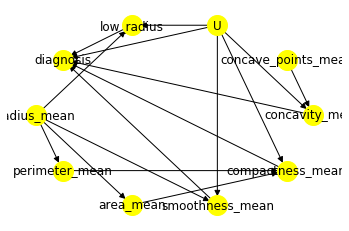

In [21]:
model2 = CausalModel(
        data = training,
        graph=causal_graph.replace("\n", " "),
        treatment='low_radius',
        outcome='diagnosis')
model2.view_model()

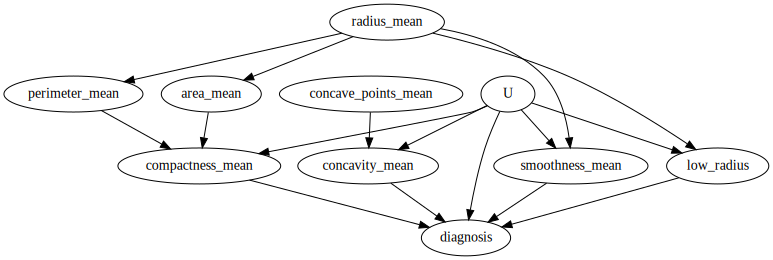

In [28]:
#area and perimeter functions of radius
from causalgraphicalmodels import CausalGraphicalModel
causal = CausalGraphicalModel(
    nodes=['radius_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean',
           'concave_points_mean','diagnosis','low_radius','U'],
    edges=[
        ("radius_mean", "perimeter_mean"), 
        ("radius_mean", "area_mean"),
        ("radius_mean","smoothness_mean"),
        ("radius_mean","low_radius"),
        ("area_mean","compactness_mean"),
        ("perimeter_mean","compactness_mean"),
        ("concave_points_mean","concavity_mean"),
        ("U","compactness_mean"),
        ("U","smoothness_mean"),
        ("U","concavity_mean"),
        ("U","low_radius"),
        ("U","diagnosis"),
        ("low_radius","diagnosis"),
        ("smoothness_mean","diagnosis"),
        ("concavity_mean","diagnosis"),
        ("compactness_mean","diagnosis")
    ]
)
causal.draw()

In [31]:
estimands2 = model2.identify_effect()
print(estimands2)

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
─────────────(Expectation(diagnosis|radius_mean,smoothness_mean,concavity_mean
d[low_radius]                                                                 

                                                                
,concave_points_mean,perimeter_mean,compactness_mean,area_mean))
                                                                
Estimand assumption 1, Unconfoundedness: If U→{low_radius} and U→diagnosis then P(diagnosis|low_radius,radius_mean,smoothness_mean,concavity_mean,concave_points_mean,perimeter_mean,compactness_mean,area_mean,U) = P(diagnosis|low_radius,radius_mean,smoothness_mean,concavity_mean,concave_points_mean,perimeter_mean,compactness_mean,

In [32]:
# Causal Effect Estimation
# Method based on estimating the treatment assignment
estimate = model2.estimate_effect(estimands2,method_name = "backdoor.propensity_score_weighting")
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
─────────────(Expectation(diagnosis|radius_mean,smoothness_mean,concavity_mean
d[low_radius]                                                                 

                                                                
,concave_points_mean,perimeter_mean,compactness_mean,area_mean))
                                                                
Estimand assumption 1, Unconfoundedness: If U→{low_radius} and U→diagnosis then P(diagnosis|low_radius,radius_mean,smoothness_mean,concavity_mean,concave_points_mean,perimeter_mean,compactness_mean,area_mean,U) = P(diagnosis|low_radius,radius_mean,smoothness_mean,concavity_mean,concave_points_mean,perimeter_mean,compactness_mean,area_mean)

## Realized estimand
b: diagnosis~low_radius+radius_mean+smoothness_mean+concavi

### Constraint on diagnosis column with lasso regularization

In [33]:
refute_train = model2.refute_estimate(estimands2,estimate, "random_common_cause")
print(refute_train)

Refute: Add a Random Common Cause
Estimated effect:0.03903547761807322
New effect:0.044952483073377625



In [34]:
refute_train = model2.refute_estimate(estimands2,estimate,"data_subset_refuter")
print(refute_train)

Refute: Use a subset of data
Estimated effect:0.03903547761807322
New effect:0.04569390564131103
p value:0.33



In [35]:
refute_train = model2.refute_estimate(estimands2,estimate, "placebo_treatment_refuter")
print(refute_train)

Refute: Use a Placebo Treatment
Estimated effect:0.03903547761807322
New effect:-0.0051619065338601965
p value:0.4



### Causal graphs using increasing fractions of the data and compare with the ground truth graph - comparison is done with a Jaccard Similarity Index, measuring the intersection and union of the graph edges


In [36]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, random_state=20, test_size=.2)

In [37]:
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas
from causalnex.structure.notears import from_pandas_lasso
sm = from_pandas(train_df.iloc[:, :12], tabu_parent_nodes=['diagnosis'],)

In [39]:
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Image
def vis_sm(sm):
    viz = plot_structure(
      sm,
      graph_attributes={"scale": "2.0", 'size': 3.0},
      all_node_attributes=NODE_STYLE.WEAK,
      all_edge_attributes=EDGE_STYLE.WEAK)
    return Image(viz.draw(format='png'))

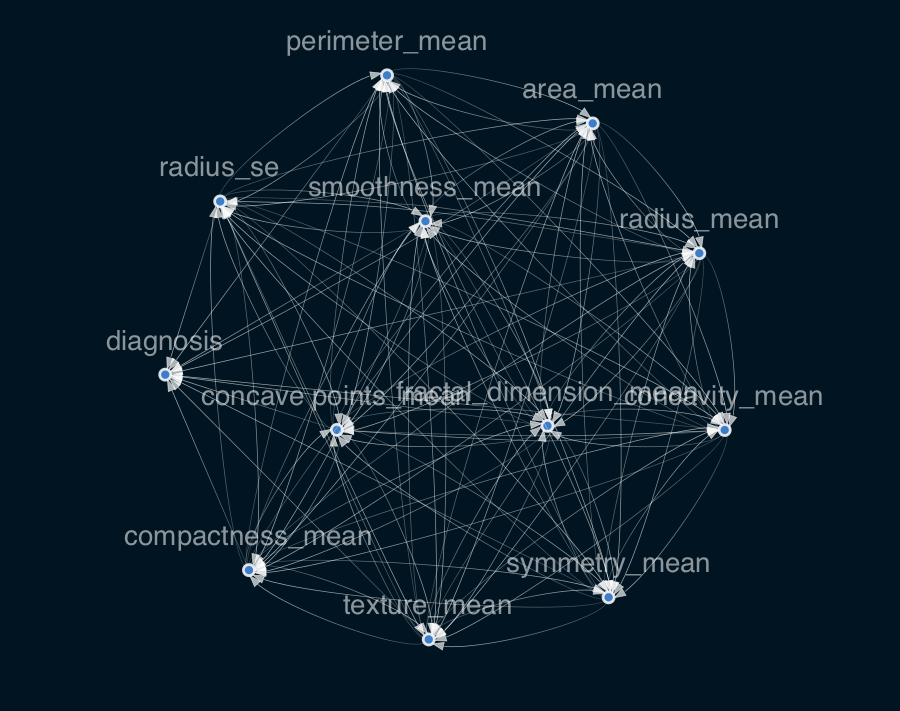

In [40]:
vis_sm(sm)

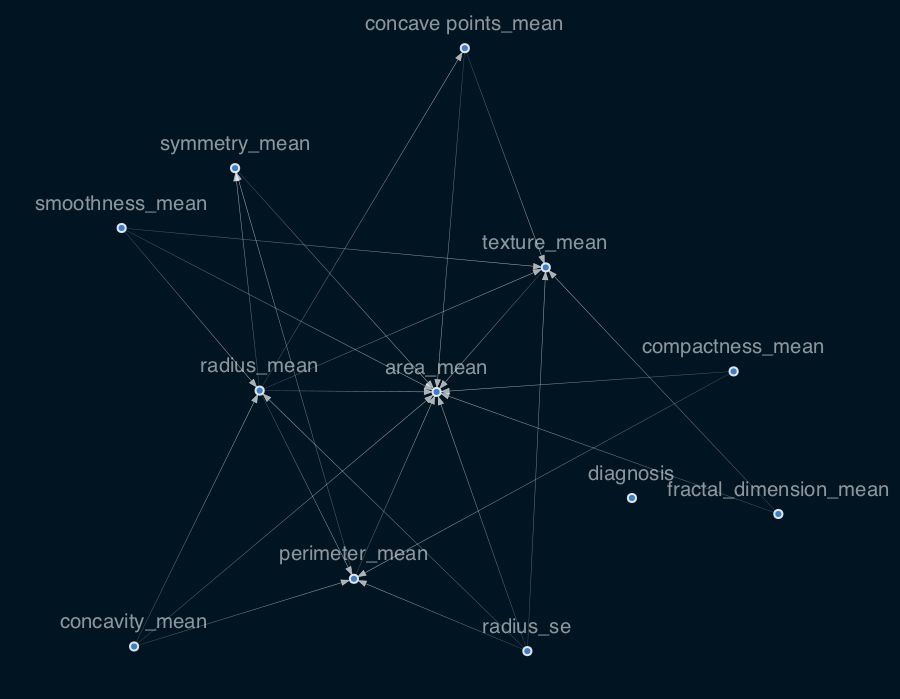

In [41]:
sm.remove_edges_below_threshold(0.9)
vis_sm(sm)

In [42]:
# 50%
causal_selected = train_df.iloc[:, :10]
portion = int(causal_selected.shape[0] *.5)
x_portion = causal_selected.head(portion)

CPU times: user 50.5 s, sys: 4.17 s, total: 54.7 s
Wall time: 29.9 s


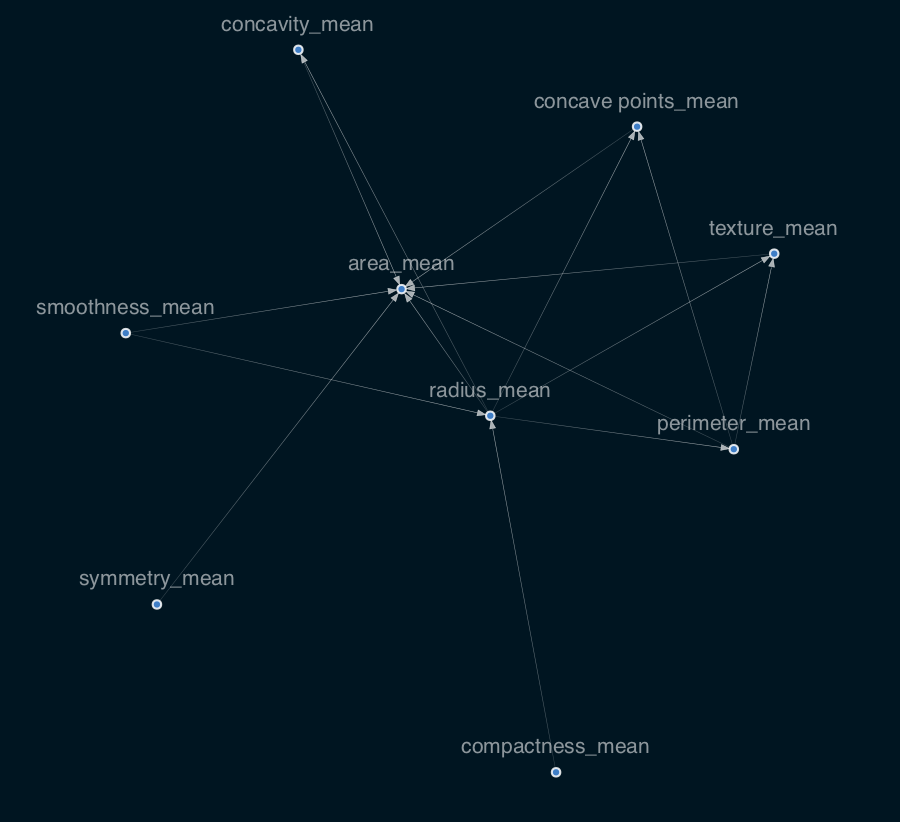

In [43]:
%%time
sm1 = from_pandas_lasso(x_portion,
                       tabu_parent_nodes=['diagnosis'],
                       w_threshold=0.3,
                       beta=0.8)
sm1 = sm1.get_largest_subgraph()
vis_sm(sm1)

In [44]:
# 60%
portion = int(causal_selected.shape[0] *.6)
x_portion = causal_selected.head(portion)

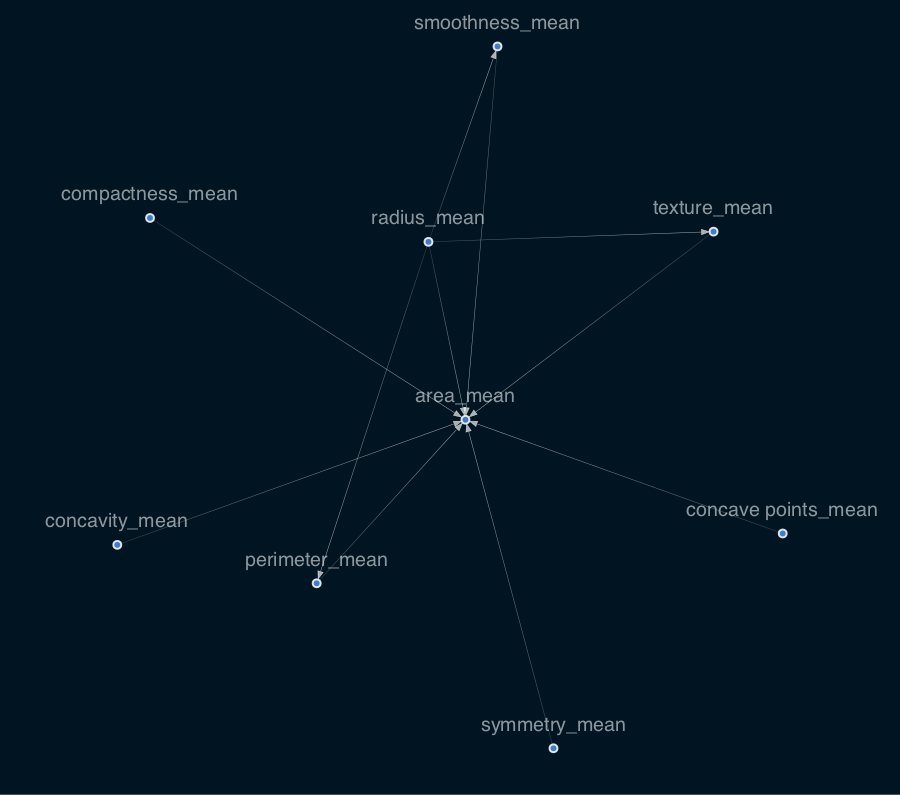

In [46]:
sm2 = from_pandas_lasso(x_portion,
                       tabu_parent_nodes=['diagnosis'],
                       w_threshold=0.3,
                       beta=0.8)
sm2 = sm2.get_largest_subgraph()
vis_sm(sm2)

In [47]:
portion = int(causal_selected.shape[0] *.9)
x_portion = causal_selected.head(portion)

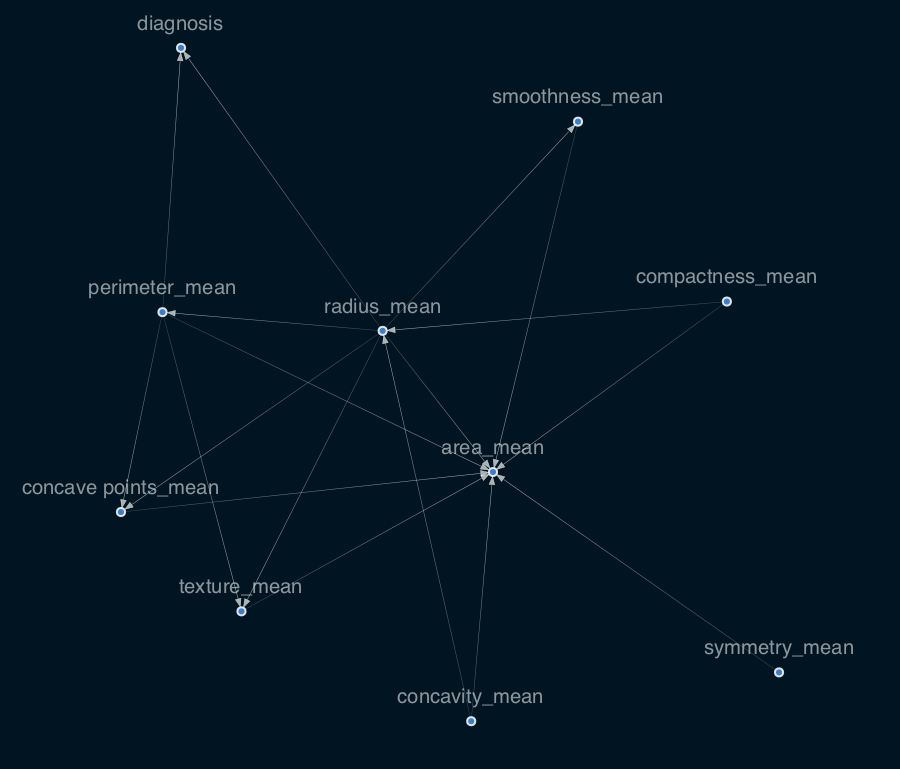

In [48]:
sm3 = from_pandas_lasso(x_portion,
                       tabu_parent_nodes=['diagnosis'],
                       w_threshold=0.3,
                       beta=0.8)
sm3 = sm3.get_largest_subgraph()
vis_sm(sm3)

In [49]:
# final graph
final_sm = from_pandas_lasso( causal_selected,
                        tabu_parent_nodes=['diagnosis'], 
                        w_threshold=0.3, 
                        beta=0.8)

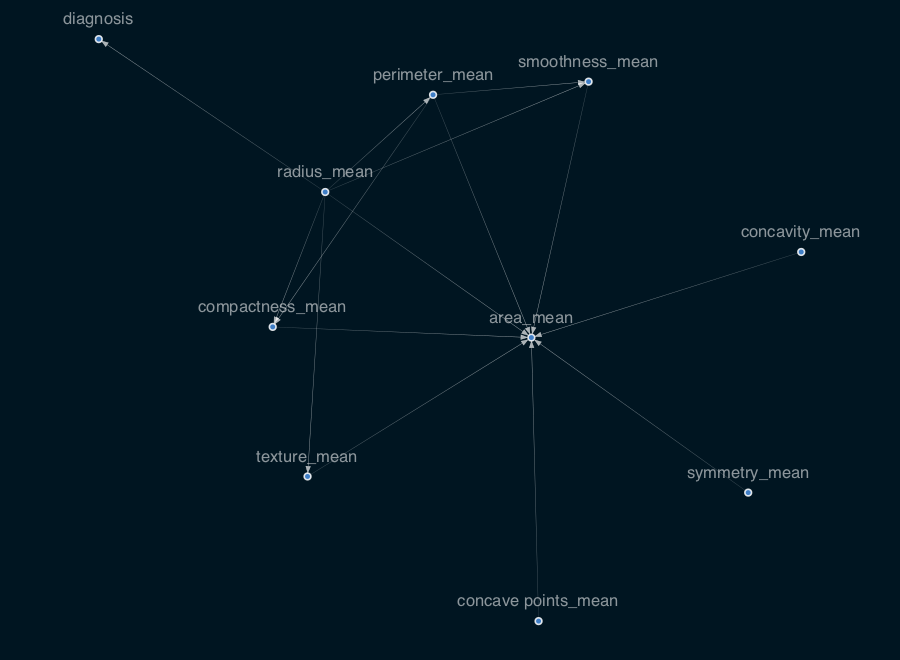

In [50]:
vis_sm(final_sm)

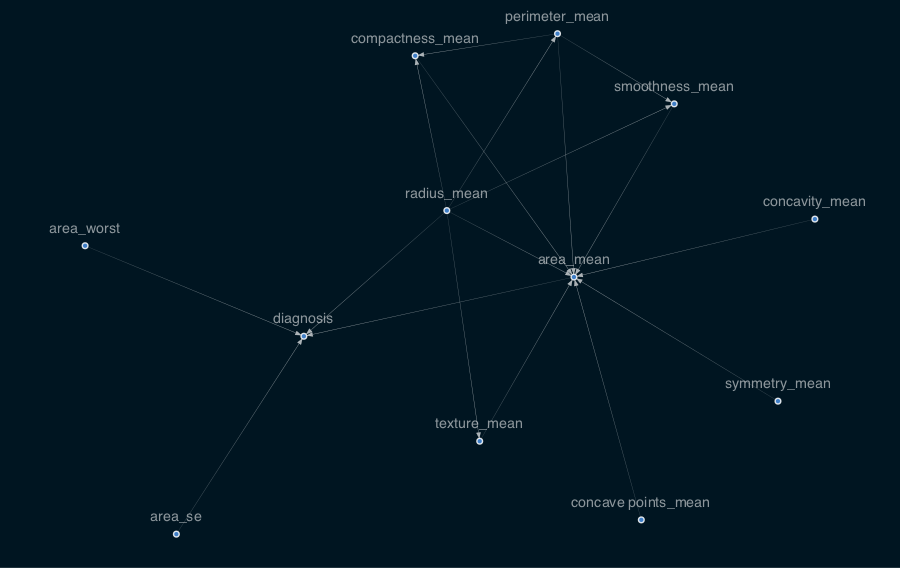

In [51]:
final_sm.add_edge("area_mean", "diagnosis")
final_sm.add_edge("area_se", "diagnosis")
final_sm.add_edge("area_worst", "diagnosis")
vis_sm(final_sm)

### Comparison is done with a Jaccard Similarity Index

In [53]:
def jaccard_similarity(g, h):
    i = set(g).intersection(h)
    return round(len(i) / (len(g) + len(h) - len(i)),3)

jaccard_similarity(sm1.edges(), sm.edges())

In [54]:
jaccard_similarity(sm2.edges(), sm.edges())

In [55]:
jaccard_similarity(sm3.edges(), sm.edges())

In [56]:
jaccard_similarity(final_sm.edges(), sm.edges())

The results obtained above are very weak, although the third graph with ninety percent portion has a percentage of 38.7 which is relatively the highest increasing fraction. As such, its features selected.

### Selecting features identified by the graph - points directly to the target variable

In [72]:
train_features = {'diagnosis','radius_mean','perimeter_mean'}
train_columns = [col for col in train_df 
                      if any(feature in col for feature in train_features)]
train_columns

['diagnosis', 'radius_mean', 'perimeter_mean']

In [73]:
training = train_df[train_columns]
valid = test_df[train_columns]

In [74]:
y_train = training.diagnosis
X_training = training.drop('diagnosis', axis=1)
y_test = valid.diagnosis
X_testing = valid.drop('diagnosis', axis=1)

In [75]:
def scaler(be_scaled):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled = scaler.fit_transform(be_scaled)
    return scaled

In [76]:
x_test = scaler(X_testing)
x_train = scaler(X_training)

In [77]:
model = Models(X_training, y_train, X_testing, y_test)

In [78]:
model.log_reg()

[0]Logistic Regression Training Accuracy: 0.8813186813186813
[1]Logistic Regression Testing Accuracy: 0.9122807017543859


In [80]:
model.random_forest()

[0]Random Forest Classifier Training Accuracy: 0.9868131868131869
[1]Random Forest Classifier Testing Accuracy: 0.8947368421052632


In [82]:
model.decision_tree()

[0]Decision Tree Classifier Training Accuracy: 1.0
[1]Decision Tree Classifier Testing Accuracy: 0.8596491228070176


In [83]:
model.svc_rbf()

[0]Support Vector Machine (RBF Classifier) Training Accuracy: 0.8857142857142857
[1]Support Vector Machine (RBF Classifier) Testing Accuracy: 0.9122807017543859


### Train model using all variables

In [85]:
train_df1 = train_df.copy()
test_df1 = test_df.copy()

# Select the target column
y_train = train_df1.diagnosis
y_test = test_df1.diagnosis

# Select the features
X_train = train_df1.drop(['diagnosis', 'low_radius'], axis=1)
X_test = test_df1.drop(['diagnosis', 'low_radius'], axis=1)

In [86]:
x_train = scaler(X_train)
x_test = scaler(X_test)

In [87]:
model = Models(x_train, y_train, x_test, y_test)

In [88]:
model.log_reg()

[0]Logistic Regression Training Accuracy: 0.9868131868131869
[1]Logistic Regression Testing Accuracy: 0.9824561403508771


In [89]:
model.random_forest()

[0]Random Forest Classifier Training Accuracy: 1.0
[1]Random Forest Classifier Testing Accuracy: 0.9736842105263158


In [90]:
model.decision_tree()

[0]Decision Tree Classifier Training Accuracy: 1.0
[1]Decision Tree Classifier Testing Accuracy: 0.956140350877193


In [91]:
model.svc_rbf()

[0]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9846153846153847
[1]Support Vector Machine (RBF Classifier) Testing Accuracy: 0.9736842105263158
